# DecisionTree

In [1]:
import pandas as pd  
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [2]:
# import some data to play with
company = pd.read_csv('Company_Data.csv')   

In [3]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
#claculate median for Sales Column to decide company value is high and low
company['Sales'].median()

7.49

In [5]:
company_val=[]
for value in company["Sales"]:
    if value <= 7.49:
        company_val.append("Low")
    else:
        company_val.append("High")
        
company["company_val"]=company_val

In [6]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,company_val
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Low
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Low
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Low


In [7]:
import warnings
warnings.filterwarnings("ignore")

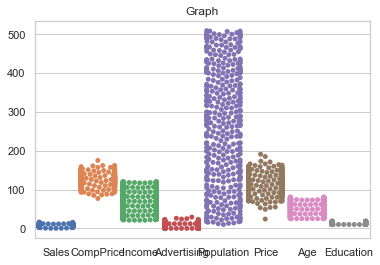

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

ax = sns.swarmplot(data=company)

plt.title('Graph')
plt.show()

<AxesSubplot:>

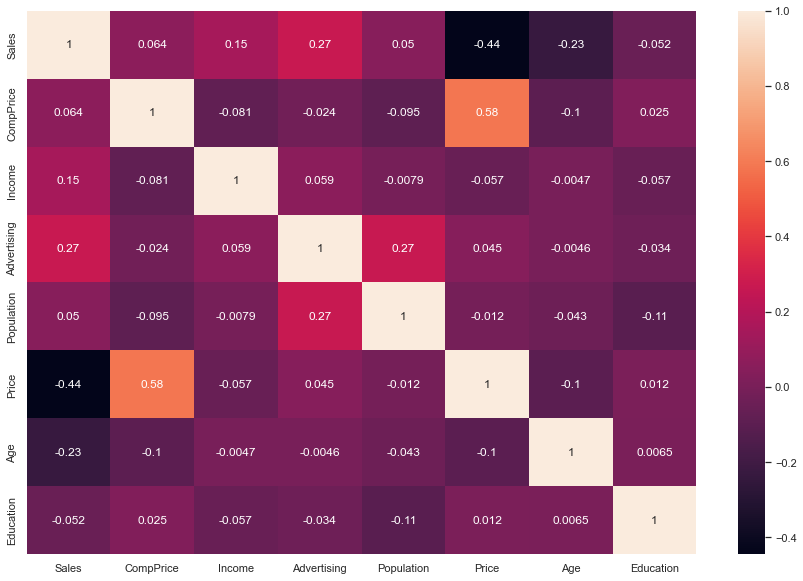

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(company.corr(),annot=True)

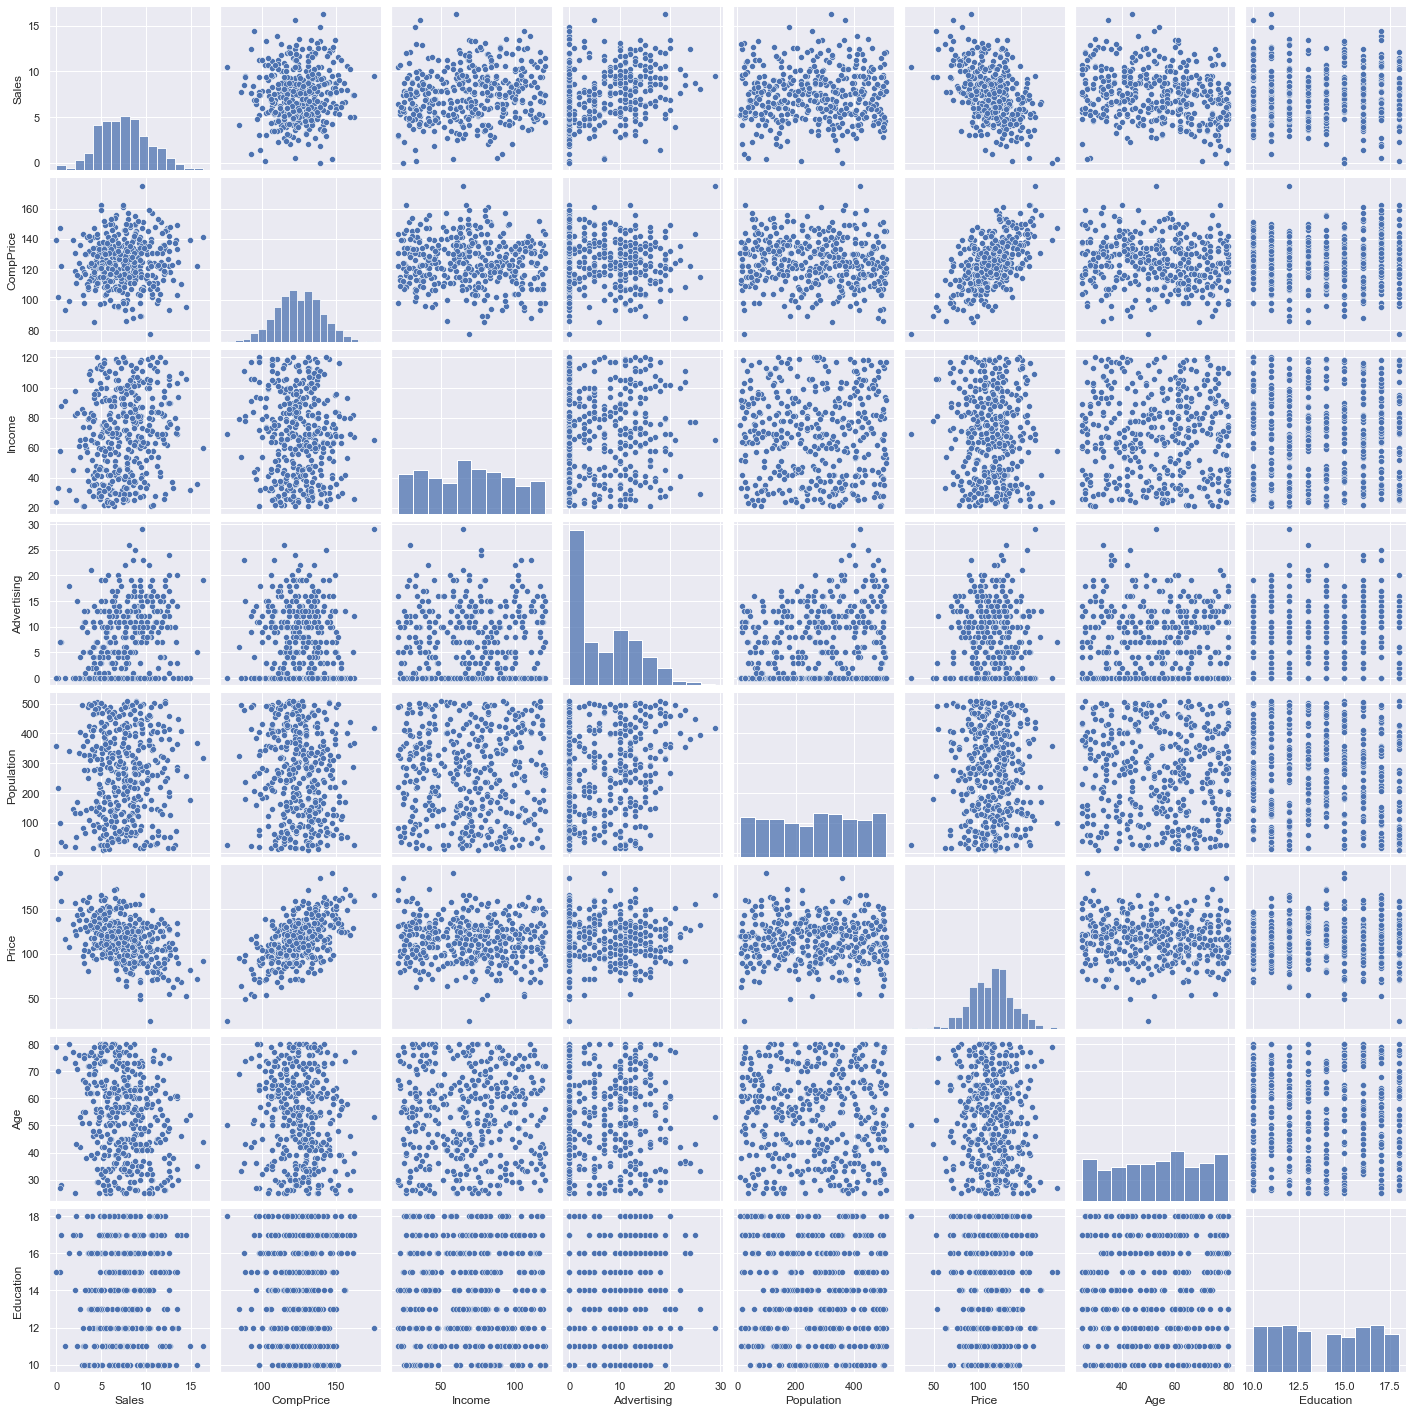

In [10]:
sns.set_style('darkgrid')
sns.pairplot(company)
plt.show()

In [11]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
 11  company_val  400 non-null    object 
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


## Changing the categorical variables into Binary


In [12]:
# using label Encoder function to convert categorical into binary

label_encoder=preprocessing.LabelEncoder()
company['ShelveLoc']=label_encoder.fit_transform(company['ShelveLoc'])
company['Urban']=label_encoder.fit_transform(company['Urban'])
company['US']=label_encoder.fit_transform(company['US'])

In [13]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,company_val
0,9.50,138,73,11,276,120,0,42,17,1,1,High
1,11.22,111,48,16,260,83,1,65,10,1,1,High
2,10.06,113,35,10,269,80,2,59,12,1,1,High
3,7.40,117,100,4,466,97,2,55,14,1,1,Low
4,4.15,141,64,3,340,128,0,38,13,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,High
396,6.14,139,23,3,37,120,2,55,11,0,1,Low
397,7.41,162,26,12,368,159,2,40,18,1,1,Low
398,5.94,100,79,7,284,95,0,50,12,1,1,Low


### Building Random Forest Classification.

In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
array = company.values
X = array[:,1:11]
Y = array[:,11]
num_trees =200
max_features = 3
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean()) 

0.805


## Bagged Decision Trees for Classification



In [15]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
X = array[:,1:11]
Y = array[:,11]
seed=7

kfold = KFold(n_splits=10,random_state=seed,shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7849999999999999


## AdaBoost Classification


In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
X = array[:,1:11]
Y = array[:,11]
num_trees = 10
seed=7
kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=None)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


0.7699999999999999
